In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from numpy import asarray
from numpy import save
from numpy import load

import pickle
import random


import pandas as pd
import seaborn as sns


In [2]:
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [3]:
with open("StrToNum.txt", "rb") as myFile:
    StrToNum = pickle.load(myFile)
with open("NumToStr.txt", "rb") as myFile:
    NumToStr = pickle.load(myFile)

In [40]:
# load numpy array from npy file
from numpy import load
# load array
trainData = load('finalTrainImgData.npy')
trainLabels = load('finalTrainClassName.npy')
# print the array
print(trainData.shape)
print(trainLabels.shape)
print(np.unique(trainLabels))

(78200, 32, 32)
(78200,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [41]:
%matplotlib notebook   

<IPython.core.display.Javascript object>


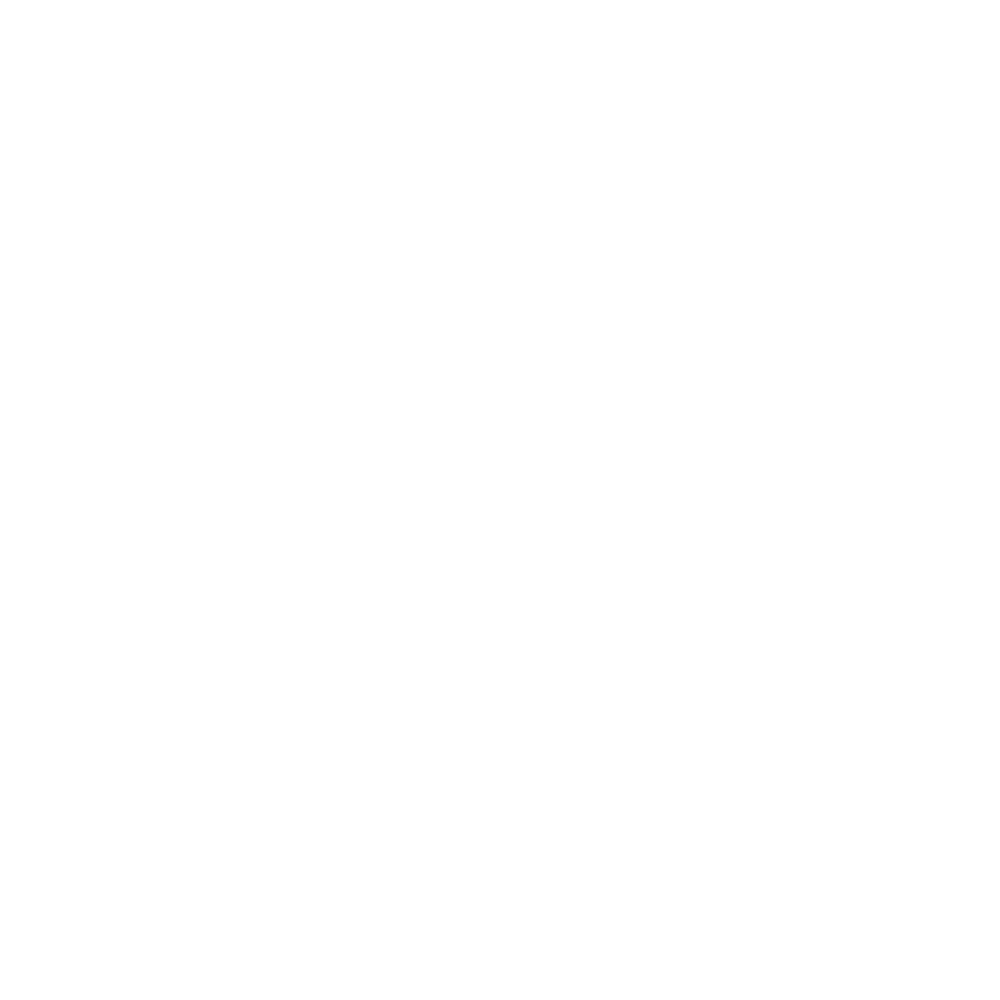

In [42]:
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 70000)
    plt.subplot(331+i)
    plt.imshow(trainData[r])
    plt.gca().set_title(NumToStr[trainLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [48]:
# load numpy array from npy file
from numpy import load
# load array
testData = load('finalTestImgData.npy')
testLabels = load('finalTestClassName.npy')
# print the array
print(testData.shape)
print(testLabels.shape)
print(np.unique(testLabels))

(13800, 32, 32)
(13800,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


<IPython.core.display.Javascript object>


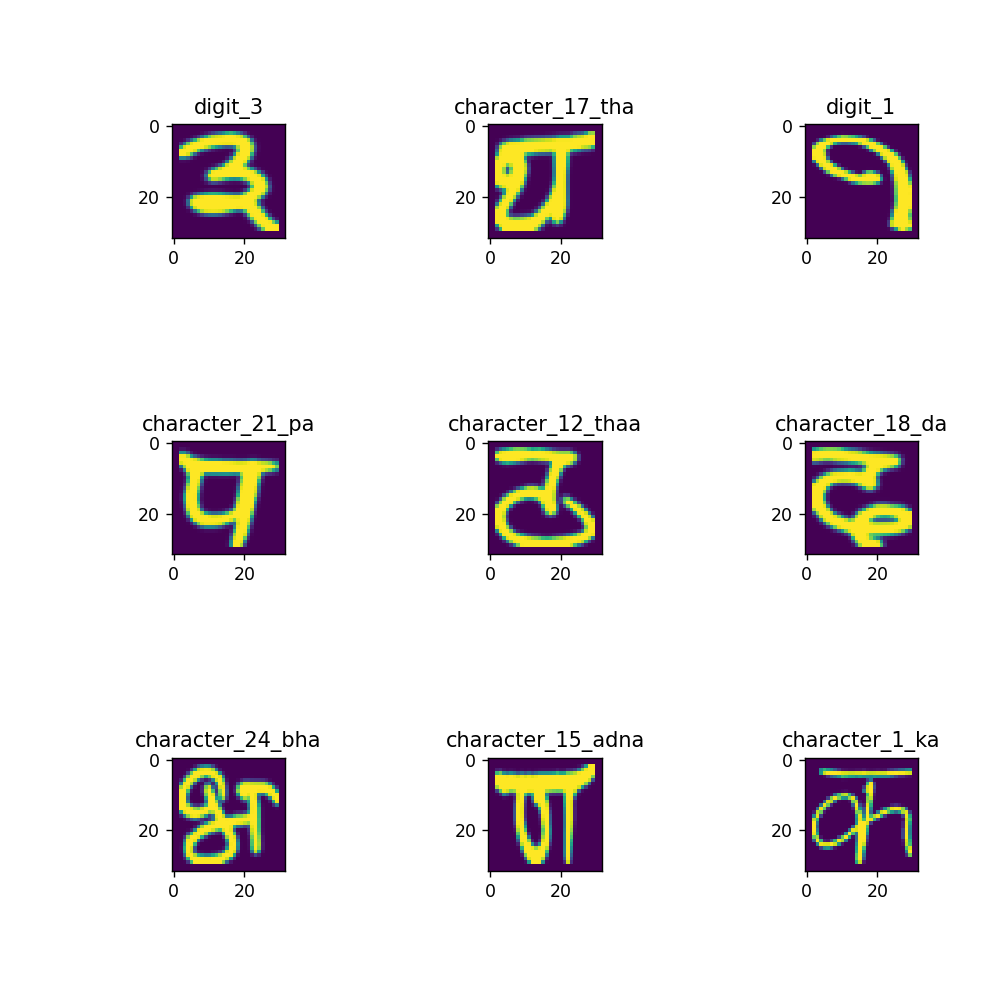

In [44]:
%matplotlib notebook       
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 13800)
    plt.subplot(331+i)
    plt.imshow(testData[r])
    plt.gca().set_title(NumToStr[testLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [60]:
IMG_SHAPE = (32, 32, 3)
n_classes = 46

In [61]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [51]:
base_model.summary()
base_model.trainable = False

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [52]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = Dense(units=n_classes)

In [53]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                58926     
Total params: 2,316,910
Trainable params: 58,926
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
#trainData=np.resize(trainData,(trainData.shape[0], *im_shape))
#testData=np.resize(testData,(testData.shape[0], *im_shape))

In [56]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(trainData, trainLabels)

ValueError: in user code:

    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer Conv1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)


In [16]:
opt = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [17]:
print(cnn.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0

In [18]:
print(trainData.shape)
print(testData.shape)
trainData=np.resize(trainData,(trainData.shape[0], *im_shape))
testData=np.resize(testData,(testData.shape[0], *im_shape))
print(trainData.shape)
print(testData.shape)


(78200, 32, 32)
(13800, 32, 32)
(78200, 32, 32, 1)
(13800, 32, 32, 1)


In [44]:
#cnn.fit(trainData, trainLabels,batch_size=32, epochs=2, validation_data=(testData, testLabels))

Epoch 1/2
2444/2444 [==============================] - 229s 94ms/step - loss: 0.1781 - accuracy: 0.9439 - val_loss: 0.1261 - val_accuracy: 0.9614
Epoch 2/2
2444/2444 [==============================] - 243s 99ms/step - loss: 0.1192 - accuracy: 0.9635 - val_loss: 0.0993 - val_accuracy: 0.9704


In [47]:
#cnn.save("cnn.h5")  # we can save the model and reload it at anytime in the future
cnn = tf.keras.models.load_model('cnn.h5')

In [48]:
scores = cnn.evaluate(testData, testLabels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.04%


In [21]:
#print(cnn.evaluate(trainData,trainLabels))

NameError: name 'model' is not defined

In [104]:
randomImgPath='D:\SOFTWARES\Jupyter\\p1.png'

<class 'PIL.Image.Image'>
(32, 32)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


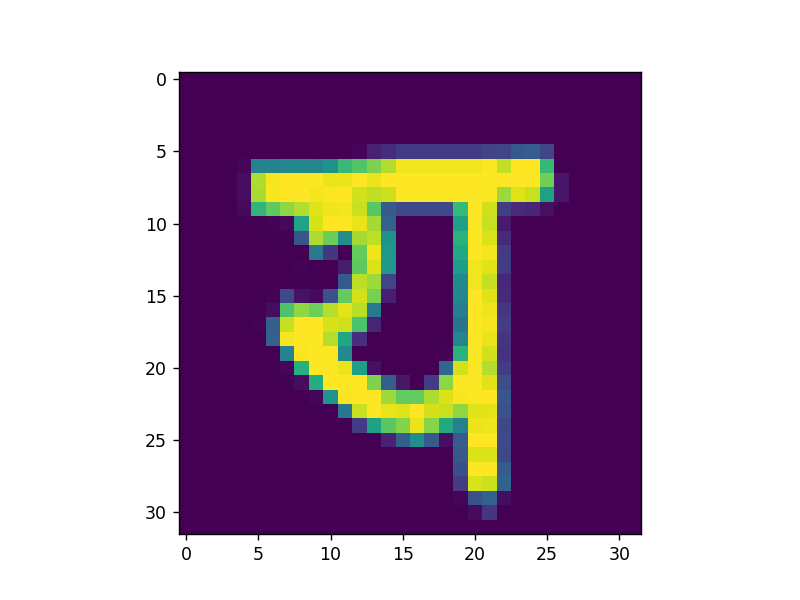

(78200, 32, 32, 1)
(1, 32, 32, 1)
character_6_cha


In [105]:
randomImg = Image.open(randomImgPath)

randomImg = randomImg.convert('L')


randomImg = randomImg.resize((32,32))
print(type(randomImg))

randomImg= np.array(randomImg)
randomImg= np.resize(randomImg,(32,32))
randomImg = randomImg.astype('float32')
randomImg /= 255  


print(randomImg.shape)

ip=np.resize(randomImg,(1,32,32,1))
# ip=testData[2:10]
print(type(ip))

plt.figure()

plt.subplot(111)
plt.imshow(ip[0])

print(trainData.shape)
print(ip.shape)
prediction = cnn.predict(ip)
print(NumToStr[np.argmax(prediction[0])])

